# Basics
In this notebook the basics of NMR are explained using the simulation at main.
At first, the whole setup must be done.

The use of a simulation ironically creates very contradictory additional difficulties.
On the one hand, it limits the accuracy of the measurement.
On the other hand, some settings are too precise and have to be altered
artificially in order to perform the measurements at all.
These difficulties will be explained further in the setup.

In [1]:
from main import measure
from helper import view, view_phase
import matplotlib.pyplot as plt
import numpy as np
import os

## Loading the sample
At first, we need a sample to use. A sample is already created and saved in sample.npy.
It consists of three 2D arrays. Each of these arrays holds another material specific property.
This may seem a little awkward since we already know the results we try to measure but since
this is a simulation we have to add some "real" values to work with.

1. Density: The density of spins within this material
2. T1: The $$T_1$$ time of the material
3. T2: The $$T_2$$ time of the material

The used sample is a 2D container of oil. With $$T_1=114\,$$ms and $$T_2=112\,$$ms.

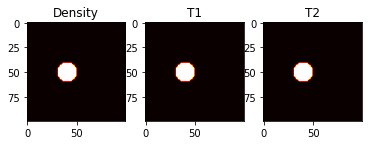

In [2]:
sample = np.load(f"{os.getcwd()}/sample.npy")
view(sample)

## Setup the NMR
- Larmor precission
- T2
- T2 *
- FID
We need a magnetic field as well as a time factor.
The time factor is related to the sample frequency.
It describes how many samples we take per ms.

In [3]:
tfactor = 2

b0 = np.zeros(sample.shape[:2])
b0.fill(0.43)
b0 += np.random.normal(0, 0.01, b0.shape)

This is where a limitation comes into account. Later we will use spin-echos
for the measurement. These echos depend on a dephasing of the spins due to
inhomogeneities of the applied magnetic field. Due to the computer we are able to
apply a perfectly homogeneous magnetic field. But since we want it to be
inhomogeneous at some point we add some random noise using the normal distribution.
The effect of this inhomogeneity can be shown easily.

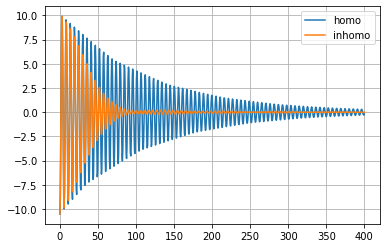

In [5]:
# setup measurement phase
t = 400 # ms
ts = np.linspace(0, t, t * tfactor, True)  # get times of the sample frequency
phases = np.zeros((t * tfactor, 4))
phases[0, 3] = np.pi / 2  # 90 pulse

sig_homo = measure(sample, 0.43, tfactor, phases)
sig_inhomo = measure(sample, b0, tfactor, phases)

plt.plot(ts, sig_homo, label="homo")
plt.plot(ts, sig_inhomo, label="inhomo")
plt.grid()
plt.legend()
plt.show()

As can be decreases the inhomogeneous more rapidly.
The Larmor frequency depends on the magnetic field.
Since this field varies, the spins have different frequencies and dephase.
![dephasing of spins](figures/basics/dephasing.gif)